In [1]:
import pickle

def unpickle(file):
    with open(file, 'rb') as f:
        pdict = pickle.load(f, encoding='bytes')
    return pdict

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
import seaborn as sns

## import metadata

In [3]:
metadata = unpickle('clf_data/batches.meta')
labels = metadata[b'label_names']
print(labels)

[b'airplane', b'automobile', b'bird', b'cat', b'deer', b'dog', b'frog', b'horse', b'ship', b'truck']


## Test 1 : Import all batches at once

### import all batches

`X_train` : (50000, 3072), 
`y_train` : (50000, 1)

In [26]:
dataset = unpickle('clf_data/data_batch_1')

X_train = dataset[b'data']
y_train = dataset[b'labels']

for i in range(2,6):
    batch = unpickle(f'clf_data/data_batch_{i}')
    batch_X = batch[b'data']
    batch_y = batch[b'labels']
    
    X_train = np.append(batch_X, X_train, axis=0)
    y_train.extend(batch_y)

X_train.shape, len(y_train)

((50000, 3072), 50000)

### import test batch

In [27]:
dataset_test = unpickle('clf_data/test_batch')

X_test = dataset_test[b'data']
y_test = dataset_test[b'labels']

X_test.shape, len(y_test)

((10000, 3072), 10000)

In [30]:
X_train[0]

array([1.        , 0.98823529, 0.99215686, ..., 0.67843137, 0.90588235,
       0.97254902])

In [29]:
X_train = X_train / 255.0
X_test = X_test / 255.0

### build model

In [34]:
logreg = LogisticRegression(solver='lbfgs', max_iter=100)

In [35]:
logreg.fit(X_train, y_train)

c:\users\visitor.slsi\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
c:\users\visitor.slsi\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
c:\users\visitor.slsi\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
c:\users\visitor.slsi\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
c:\users\

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### evaluate

In [36]:
pred = logreg.predict(X_test[0].reshape(1,-1))
labels[pred[0]]

b'cat'

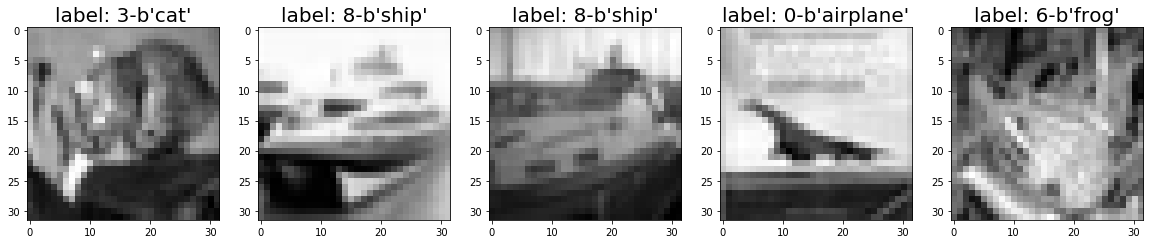

In [37]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(X_test[:5], y_test)):
    plt.subplot(1,5, index+1)
    plt.imshow(np.reshape(image[:1024], (32,32)), cmap=plt.cm.gray)
    plt.title(f'label: {label}-{labels[label]}', fontsize=20)

In [38]:
predictions = logreg.predict(X_test)

In [39]:
score = logreg.score(X_test, y_test)
print(score)

0.2666


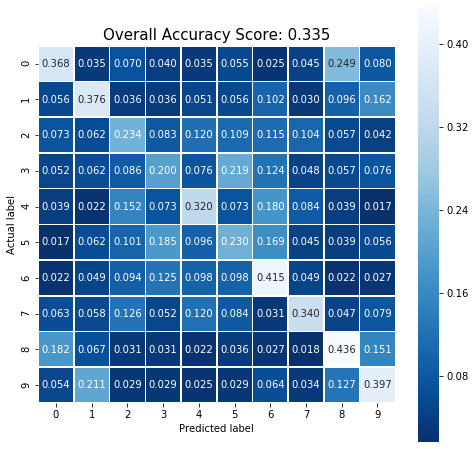

In [53]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, predictions)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Overall Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);
plt.savefig('ConfusionMatrix_LR_all.png')
plt.show();

## Test 2 : import batch 1 only

### import batch 1

In [41]:
dataset = unpickle('clf_data/data_batch_1')
X = dataset[b'data']
y = dataset[b'labels']
print(X.shape, len(y))

(10000, 3072) 10000


In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [43]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [44]:
X_train.shape, len(y_train)

((8000, 3072), 8000)

### build and train model

In [45]:
logreg = LogisticRegression(solver='lbfgs')

In [46]:
logreg.fit(X_train, y_train)

c:\users\visitor.slsi\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
c:\users\visitor.slsi\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
c:\users\visitor.slsi\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
c:\users\visitor.slsi\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
c:\users\

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### evaluate

In [47]:
logreg.predict(X_test[0].reshape(1,-1))

array([4])

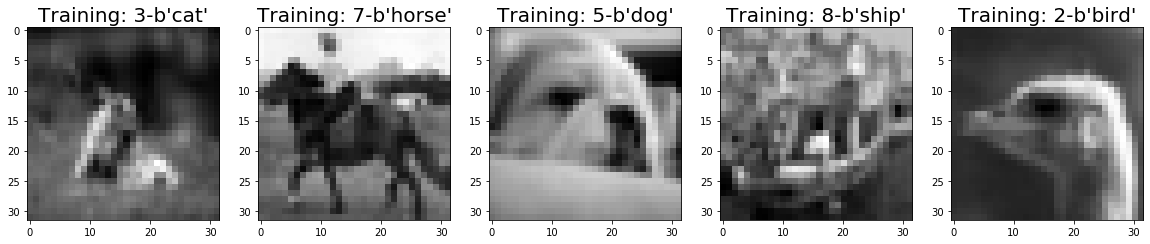

In [48]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(X_test[:5], y_test)):
    plt.subplot(1,5, index+1)
    plt.imshow(np.reshape(image[:1024], (32,32)), cmap=plt.cm.gray)
    plt.title(f'Training: {label}-{labels[label]}', fontsize=20)

In [49]:
predictions = logreg.predict(X_test)

In [50]:
score = logreg.score(X_test, y_test)
print(score)

0.335


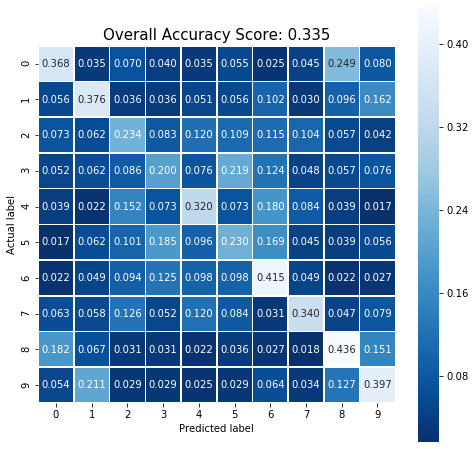

In [52]:
cm = confusion_matrix(y_test, predictions)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Overall Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);
plt.savefig('ConfusionMatrix_LR_batch1.png')
plt.show();